In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from selenium import webdriver
import time
import webscraping

Let's take a look at the top scorers in the prem...

In [52]:
#data collection
webscraping.get_premTopGoals()

In [72]:
#data cleaning
df = pd.read_csv("premTopGoals.csv")
df = df.head(n=10)
df = df.drop(columns=['Unnamed: 0', 'GS', 'MP', 'YC', 'RC'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'G':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(10):
    df.at[i, 'Name'] = df.at[i, 'Name'].split()[1].strip(',')
print(df)

         Name  Games  Goals  Assists  Shots on Goal  Total Shots
0      Aguero     24     18        6             33           90
1       Salah     28     17        6             47           94
2  Aubameyang     27     16        3             28           68
3        Kane     24     15        4             44           86
4        Mane     26     14        1             32           61
5   Lacazette     27     12        5             27           58
6      Hazard     26     12       10             31           67
7    Sterling     25     12        8             27           50
8  Sigurdsson     28     11        3             23           63
9       Pogba     25     11        9             42           81


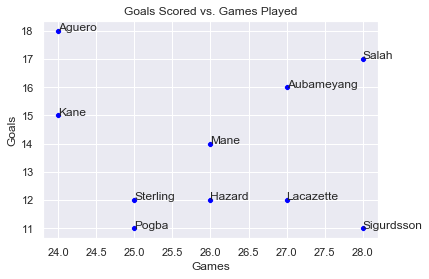

In [73]:
#visualization of top scorers
sns.set(style="darkgrid")
sns.set_palette("Dark2")
scatter = sns.scatterplot(x = "Games", y = "Goals", color = "blue", data = df)
scatter.set_title("Goals Scored vs. Games Played")


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        scatter.text(point['x'], point['y'], str(point['val']))

label_point(df.Games, df.Goals, df.Name, scatter)
plt.show()

In [99]:
print(df)

         Name  Games  Goals  Assists  Shots on Goal  Total Shots
0      Aguero     24     18        6             33           90
1       Salah     28     17        6             47           94
2  Aubameyang     27     16        3             28           68
3        Kane     24     15        4             44           86
4        Mane     26     14        1             32           61
5   Lacazette     27     12        5             27           58
6      Hazard     26     12       10             31           67
7    Sterling     25     12        8             27           50
8  Sigurdsson     28     11        3             23           63
9       Pogba     25     11        9             42           81


         Name  Games  Goals  Assists  Shots on Goal  Total Shots
0      Aguero     24     18        6             33           90
1       Salah     28     17        6             47           94
2  Aubameyang     27     16        3             28           68
3        Kane     24     15        4             44           86
4        Mane     26     14        1             32           61
5   Lacazette     27     12        5             27           58
6      Hazard     26     12       10             31           67
7    Sterling     25     12        8             27           50
8  Sigurdsson     28     11        3             23           63
9       Pogba     25     11        9             42           81


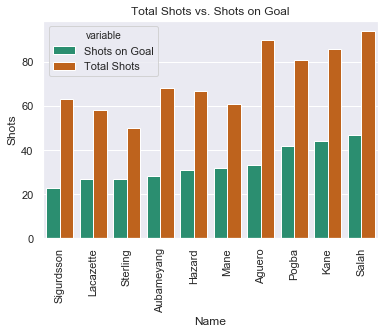

In [98]:
#visualization of top scorers' efficiency
df1 = pd.melt(df, id_vars=['Name','Games', 'Goals', 'Assists']).sort_values(['variable','value'])

bar = sns.barplot(x='Name', y='value', hue='variable', data=df1)
plt.xticks(rotation=90)
plt.ylabel('Shots')
plt.title('Total Shots vs. Shots on Goal');